2025-03-06 02:12:13 - INFO - DesignResponse - Loading response data for model: sentinel_2A
2025-03-06 02:12:18 - INFO - DesignResponse - Computing response matrix
2025-03-06 02:12:18 - INFO - DesignResponse - Response matrix initialization completed
2025-03-06 02:12:18 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\aphys2.txt
2025-03-06 02:12:18 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\ephys2.txt
2025-03-06 02:12:18 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_micro.txt
2025-03-06 02:12:18 - INFO - ChlAbsorptionModel - Initializing property from C:\Users\medalix\Desktop\Phd_Dev\sasha.v.0.0.1\src\share\env_input\abs_spec_nano.txt
2025-03-06 02:12:18 - INFO - ChlAbsorptionModel - Initialized Chl Absorption Model with model option: log_bricaud
2

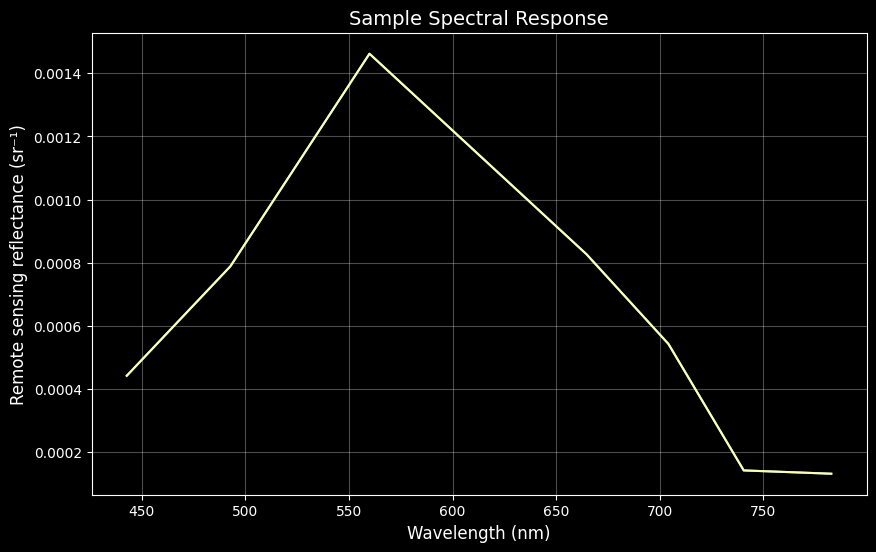

In [1]:
import  logging
from    sasha.wrappers.run_model import ReflectanceSimulator 
model   =   ReflectanceSimulator(config_path='../config_model.yml',
                             **{
                                "prop_type": 'rrsp',
                                # "sensor"   : 'sentinel_2A', # select from ['sentinel_2A', 'sentinel_2B', 'dirac', 'hyspex_muosli']
                                "backend"  : 'JAX', # select from ['JAX', 'NUMPY', 'TENSORFLOW']
                                # 'logging': logging.DEBUG,
                                }
                            )    

#  Compute spectra 
#  Run with 1 Spectra
params = {
    'z': 1,            # Depth in meters
    'alpha_m_1': .2,   # Mixing ratio of mineral 1 and vegetation 0;
    'chl': 0.01,       # Chlorophyll
    'cdom': 0.01,      # Colored dissolved organic matter
    'tsm':.1           # Total suspended matter
}


# Run with N Spectra
params = {
    'z': [15,15],            # Depth in meters
    'alpha_m_1': [0,1],      # Mixing ratio of mineral 1 and vegetation 0;
    'chl': [0.01,0.01],      # Chlorophyll
    'cdom': [0.001,0.001],   # Colored dissolved organic matter
    'tsm': [0.1,0.1]         # Total suspended matter
}


reflectance = model.simulate(params)
model.plot(reflectance, "Sample Spectral Response")
